# Arima

### Libraries

In [74]:
import pandas as pd
import numpy as np
import quandl
from matplotlib import pylab as plt
%matplotlib inline
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

#### Data Import
The python package quandl is great for getting time series data. They have direct connections to thousands of commodity time series which we can use. We will pull data for palladium pricing and we will request all the data they have available on the price.

In [4]:
data = quandl.get('LPPM/PALL', start_date='1950-12-01', end_date='2018-12-01')
data.describe()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
count,7245.000000,5032.000000,7245.000000,7192.000000,4997.000000,7192.000000
mean,407.782823,445.328671,264.526718,408.124562,445.835069,264.820309
std,273.523261,227.874895,196.958243,273.892382,228.090984,197.313092
min,78.750000,116.100000,40.400000,78.250000,122.750000,41.000000
25%,169.750000,248.150000,100.300000,168.375000,247.850000,100.287500
50%,330.000000,434.650000,181.750000,330.000000,435.700000,181.975000
75%,656.000000,596.125000,427.700000,657.000000,598.450000,429.117500
max,1192.000000,1179.500000,932.710000,1205.000000,1179.650000,943.990000


We will focus primarily on the USD AM so we will drop the rest of the data

In [5]:
usd = data['USD AM']

Lets plot the palldaium price so we can see what the historical pricing of palladium has been.

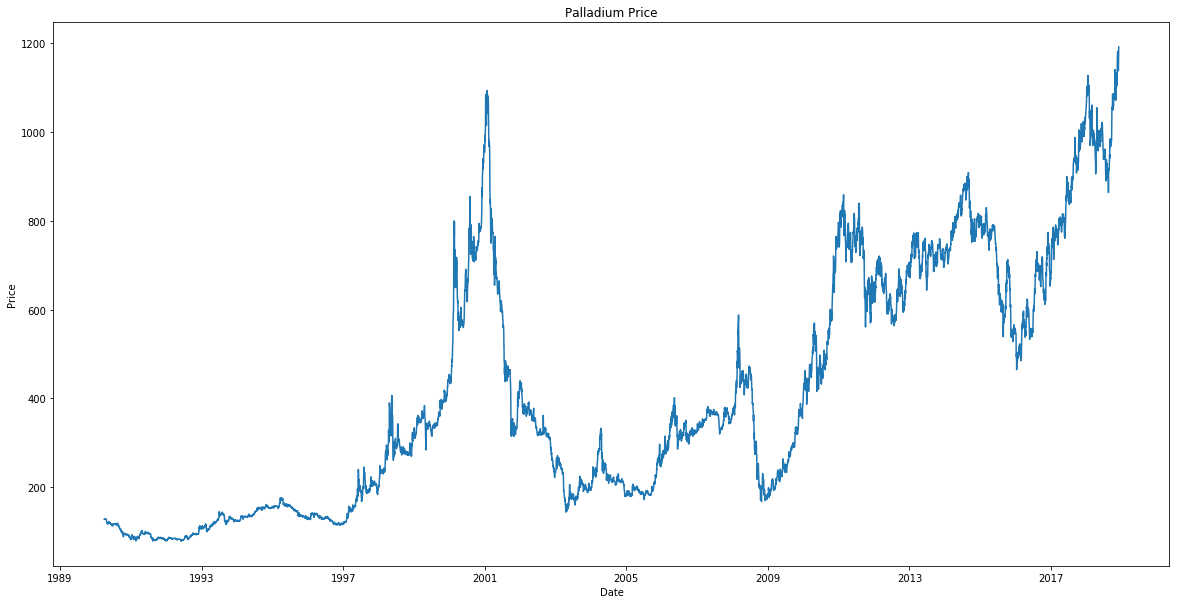

In [6]:
plt.figure(figsize=(20,10))
plt.title("Palladium Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(usd)

In [7]:
thirty_day_average = usd.rolling(window= 30).mean()
year_average = usd.rolling(window = 365).mean()
thirty_day_std = usd.rolling(window= 30).std()
year_std = usd.rolling(window = 365).std()

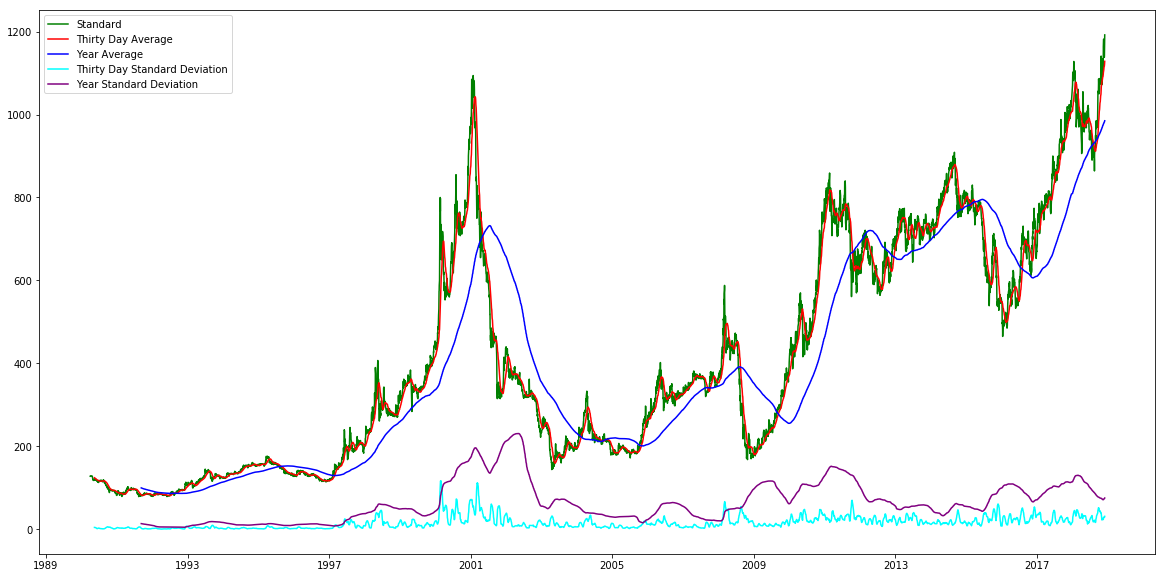

In [8]:
plt.figure(figsize=(20,10))
normal = plt.plot(usd, color = 'green', label = 'Standard')
TDA = plt.plot(thirty_day_average, color = 'red', label = 'Thirty Day Average')
YA = plt.plot(year_average, color = 'blue', label = 'Year Average')
TDSTD = plt.plot(thirty_day_std, color = 'cyan', label = 'Thirty Day Standard Deviation')
YSTD = plt.plot(year_std, color = 'purple', label = 'Year Standard Deviation')
plt.legend()
plt.show()

In [ ]:
standard deviation bands

# Statisical Tests for Stationarity

##### We can preform an Augmented Dickey Fuller Test (ADF) to check for stationarity

Null Hypothesis - we are not stationary 

Alternative Hypothesis - we are stationary

If our P values are 'significant' we can assume the dataset is stationary.

In [23]:
def format_nice(x):
    print('Results of ADF:')
    print('Test Statistic: {:>20}'.format(str(round(x[0], 4))))
    print('P Value: {:>27}'.format(str(round(x[1], 8))))
    print('Lags Used: {:>20}'.format(str(x[2])))
    print('Number of Observations: {:>7}'.format(str(x[3])))
    print('Critical Value 1%: {:>17}'.format(str(round(x[4]['1%'], 4))))
    print('Critical Value 5%: {:>17}'.format(str(round(x[4]['5%'], 4))))
    print('Critical Value 10%: {:>15}'.format(str(round(x[4]['10%'], 4))))

# ADF

In [10]:
result = ts.adfuller(usd, 1)
format_nice(result)

Results of ADF:
Test Statistic:              -0.2904
P Value:                  0.92685456
Lags Used:                    1
Number of Observations:    7243
Critical Value 1%:           -3.4313
Critical Value 5%:           -2.8619
Critical Value 10%:          -2.567


### Stationarity
When using an Arima model it is very important that our dataset is stationary. Stationarity is fundamental for many of the assumptions that are made. Stationarity is defined as having a constant statistical properties such as mean, standard deviation, and autocorrelation. Based on our plot of the rolling means and standard deviation we can clearly see that our data set is not stationary. Also, by using the Dickey Fuller Test we can see that we do not reject the null and assume that this data is not stationary. This will pose problems when trying to predict and we need to try and get this dataset stationary prior to making any predictions. To make our dataset stationary we can preform various transformations on them and measure the impact these transformations have made. 


# First Difference


In [12]:
dif_usd = usd.diff()
dif_thirty_day_average = dif_usd.rolling(window= 30).mean()
dif_year_average = dif_usd.rolling(window = 365).mean()
dif_thirty_day_std = dif_usd.rolling(window= 30).std()
dif_year_std = dif_usd.rolling(window = 365).std()

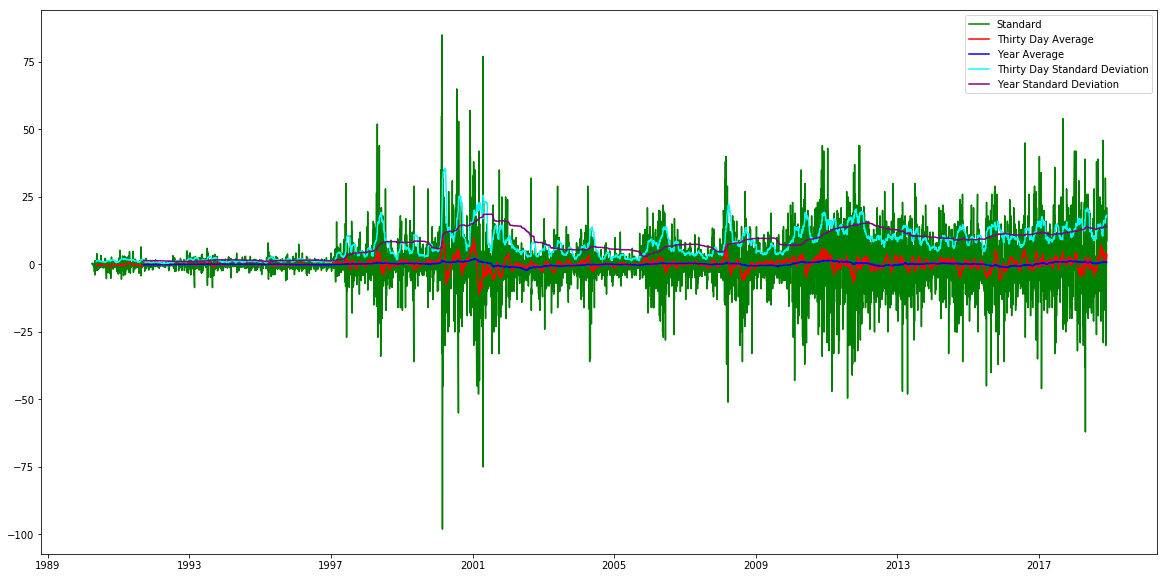

In [13]:
plt.figure(figsize=(20,10))
normal = plt.plot(dif_usd, color = 'green', label = 'Standard')
TDA = plt.plot(dif_thirty_day_average, color = 'red', label = 'Thirty Day Average')
YA = plt.plot(dif_year_average, color = 'blue', label = 'Year Average')
TDSTD = plt.plot(dif_thirty_day_std, color = 'cyan', label = 'Thirty Day Standard Deviation')
YSTD = plt.plot(dif_year_std, color = 'purple', label = 'Year Standard Deviation')
plt.legend()
plt.show()

Differencing the dataset has helped the average of the dataset get to a mean of 0. 

# First Difference ADF

Differencing creates a couple of observations at the very beginning of the dataset that we are unable to use. These observations will be dropped.

In [14]:
result = ts.adfuller(dif_usd.dropna(), 1)
format_nice(result)

Results of ADF:
Test Statistic:             -81.2925
P Value:                         0.0
Lags Used:                    0
Number of Observations:    7243
Critical Value 1%:           -3.4313
Critical Value 5%:           -2.8619
Critical Value 10%:          -2.567


### Log Transformation

In [15]:
log_usd = np.log(usd)
log_thirty_day_average = log_usd.rolling(window= 30).mean()
log_year_average = log_usd.rolling(window = 365).mean()
log_thirty_day_std = log_usd.rolling(window= 30).std()
log_year_std = log_usd.rolling(window = 365).std()

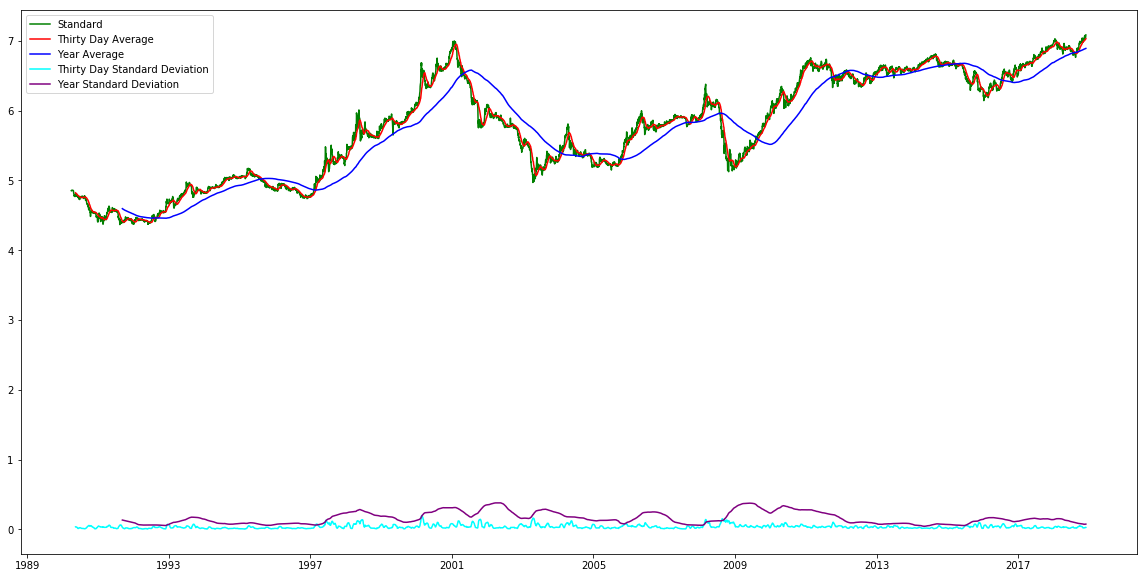

In [16]:
plt.figure(figsize=(20,10))
normal = plt.plot(log_usd, color = 'green', label = 'Standard')
TDA = plt.plot(log_thirty_day_average, color = 'red', label = 'Thirty Day Average')
YA = plt.plot(log_year_average, color = 'blue', label = 'Year Average')
TDSTD = plt.plot(log_thirty_day_std, color = 'cyan', label = 'Thirty Day Standard Deviation')
YSTD = plt.plot(log_year_std, color = 'purple', label = 'Year Standard Deviation')
plt.legend()
plt.show()

In [ ]:
basic log operations

A log transformation has helped but lets try additional transformations to get it stationary.

# Log ADF

In [125]:
result = ts.adfuller(log_usd, 1)
format_nice(result)

Results of ADF:
Test Statistic:              -0.8439
P Value:                      0.8059
Lags Used:                    1
Number of Observations:    7243
Critical Value 1%:           -3.4313
Critical Value 5%:           -2.8619
Critical Value 10%:          -2.567


# Log Then First Difference

In [18]:
dif_log_usd = np.log(usd).diff()
dif_log_thirty_day_average = dif_log_usd.rolling(window= 30).mean()
dif_log_year_average = dif_log_usd.rolling(window = 365).mean()
dif_log_thirty_day_std = dif_log_usd.rolling(window= 30).std()
dif_log_year_std = dif_log_usd.rolling(window = 365).std()

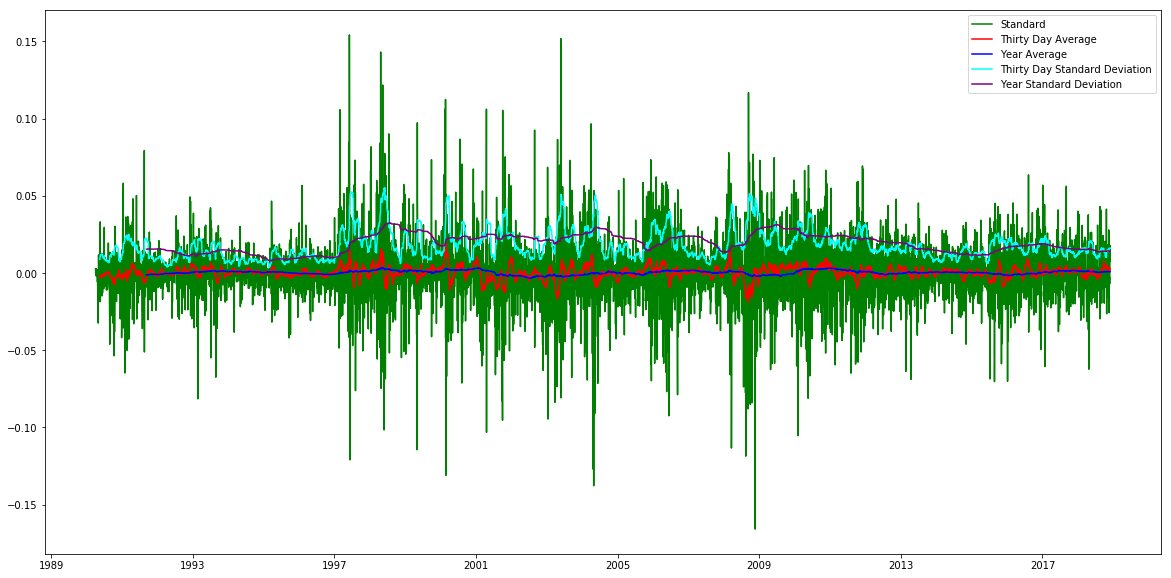

In [19]:
plt.figure(figsize=(20,10))
normal = plt.plot(dif_log_usd, color = 'green', label = 'Standard')
TDA = plt.plot(dif_log_thirty_day_average, color = 'red', label = 'Thirty Day Average')
YA = plt.plot(dif_log_year_average, color = 'blue', label = 'Year Average')
TDSTD = plt.plot(dif_log_thirty_day_std, color = 'cyan', label = 'Thirty Day Standard Deviation')
YSTD = plt.plot(dif_log_year_std, color = 'purple', label = 'Year Standard Deviation')
plt.legend()
plt.show()

Out of all of the transformations we have done it appears from the graphs that the log difference transformation gives us a dataset which is most stationary. To further test this we can do statistical tests on our data.

# Log + First Difference ADF

Differencing creates a couple of observations at the very beginning of the dataset that we are unable to use. These observations will be dropped.

In [128]:
result = ts.adfuller(dif_log_usd.dropna(), 1)
format_nice(result)

Results of ADF:
Test Statistic:             -60.6745
P Value:                         0.0
Lags Used:                    1
Number of Observations:    7242
Critical Value 1%:           -3.4313
Critical Value 5%:           -2.8619
Critical Value 10%:          -2.567


# Comparing Transfomations

In our previous tests we compared First Difference, Log, and Log First Difference. In our Dickey Fuller Tests we see that the First Difference statistic had the best value at -81.29. We will use this going forward as we attempt to develop models on this data. We will next use ACF and PACF plots to help us determine what type of ARIMA models may fit this data.

## ACF Plot

<Container object of 41 artists>

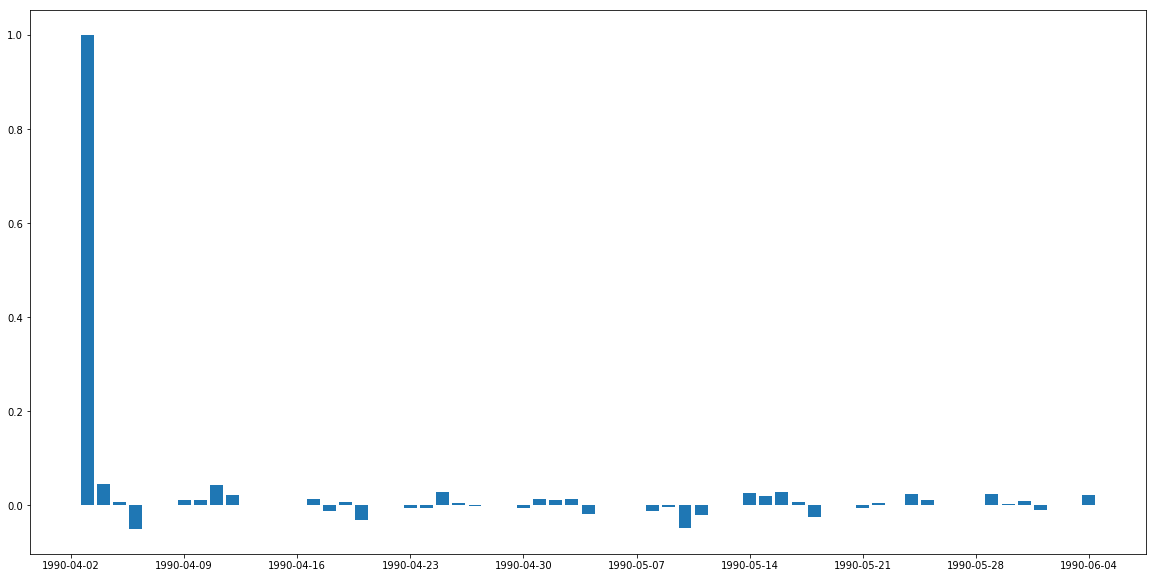

In [62]:
dropped = dif_usd.dropna()
plt.figure(figsize=(20,10))
plt.bar(dropped.index[:41], acf(dropped))

This ACF plot follows a MA 1 type of model, this may be a good choice to fit this model.

## PACF Plot

<Container object of 41 artists>

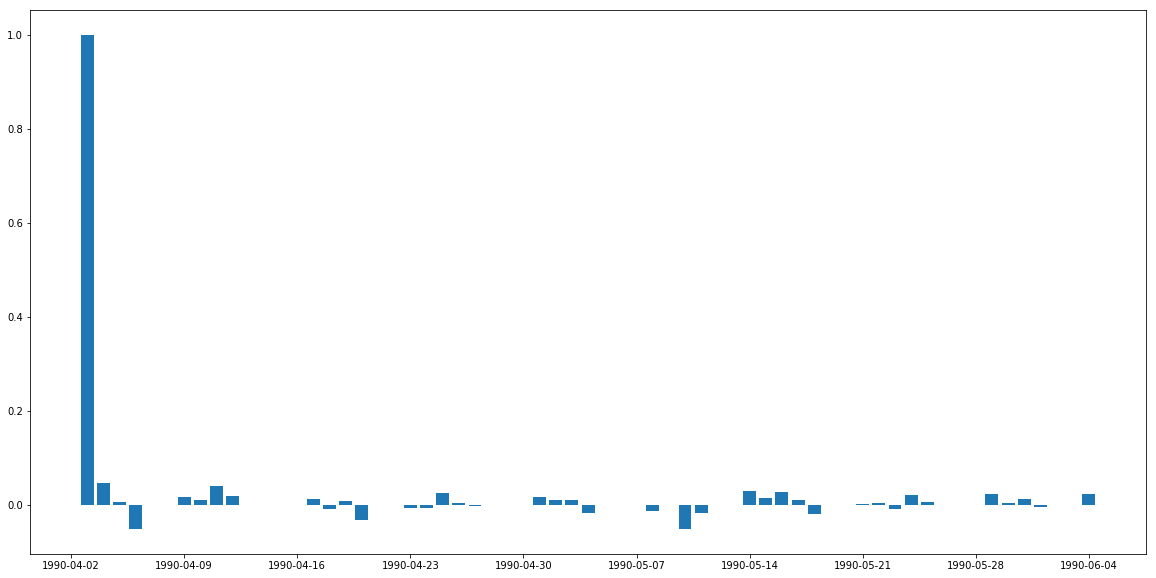

In [63]:
dropped = dif_usd.dropna()
plt.figure(figsize=(20,10))
plt.bar(dropped.index[:41], pacf(dropped))

This plot doesnt fit anything in particular but it doesn't lead me to believe that it's not a MA model.

# Model Fitting and Creation

In [75]:
model = ARIMA(dropped, order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 USD AM   No. Observations:                 7244
Model:                     ARMA(0, 1)   Log Likelihood              -26322.908
Method:                       css-mle   S.D. of innovations              9.160
Date:                Fri, 22 Feb 2019   AIC                          52651.816
Time:                        16:37:41   BIC                          52672.480
Sample:                    04-03-1990   HQIC                         52658.925
                         - 11-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1469      0.112      1.307      0.191      -0.073       0.367
ma.L1.USD AM     0.0447      0.012      3.864      0.000       0.022       0.067
                                    Roots   

In [76]:
model = ARIMA(dropped, order=(0,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                 USD AM   No. Observations:                 7244
Model:                     ARMA(0, 2)   Log Likelihood              -26322.368
Method:                       css-mle   S.D. of innovations              9.159
Date:                Fri, 22 Feb 2019   AIC                          52652.737
Time:                        16:37:43   BIC                          52680.289
Sample:                    04-03-1990   HQIC                         52662.215
                         - 11-30-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1470      0.114      1.290      0.197      -0.076       0.370
ma.L1.USD AM     0.0465      0.012      3.927      0.000       0.023       0.070
ma.L2.USD AM     0.0122      0.012      1.03